In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
path = '../../All_data_sets/model_data_set/linear_regression/Car_Price_Prediction.csv'

In [3]:
df = pd.read_csv( path )

In [4]:
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [5]:
df.shape

(1000, 8)

In [6]:
df.rename(columns=str.lower , inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          1000 non-null   object 
 1   model         1000 non-null   object 
 2   year          1000 non-null   int64  
 3   engine size   1000 non-null   float64
 4   mileage       1000 non-null   int64  
 5   fuel type     1000 non-null   object 
 6   transmission  1000 non-null   object 
 7   price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


### Categorical columns unique values

In [8]:
df['make'].unique()

array(['Honda', 'Ford', 'BMW', 'Audi', 'Toyota'], dtype=object)

In [9]:
df['model'].unique()

array(['Model B', 'Model C', 'Model A', 'Model D', 'Model E'],
      dtype=object)

In [10]:
df['fuel type'].unique()

array(['Petrol', 'Electric', 'Diesel'], dtype=object)

In [11]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
df.columns

Index(['make', 'model', 'year', 'engine size', 'mileage', 'fuel type',
       'transmission', 'price'],
      dtype='object')

In [13]:
cat_cols = ['make', 'model', 'fuel type','transmission']

In [14]:
num_cols = ['year', 'engine size', 'mileage', 'price']

In [15]:
df_num_cols = df[num_cols]

### One hot encoder

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False , dtype=int), cat_cols)
    ],
    remainder='passthrough'  
)


In [17]:
X_transformed = preprocessor.fit_transform(df)

In [18]:
col_names = preprocessor.get_feature_names_out()

In [19]:
df_final = pd.DataFrame( data=X_transformed , columns=col_names )

df_final.head()

,cat__make_BMW,cat__make_Ford,cat__make_Honda,cat__make_Toyota,cat__model_Model B,cat__model_Model C,cat__model_Model D,cat__model_Model E,cat__fuel type_Electric,cat__fuel type_Petrol,cat__transmission_Manual,remainder__year,remainder__engine size,remainder__mileage,remainder__price
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2015.0,3.9,74176.0,30246.207931
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2014.0,1.7,94799.0,22785.747684
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2006.0,4.1,98385.0,25760.290347
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2015.0,2.6,88919.0,25638.003491
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2004.0,3.4,138482.0,21021.386657


In [20]:
df_final[col_names] = df_final[col_names].astype( int )

In [21]:
df_final.head()

,cat__make_BMW,cat__make_Ford,cat__make_Honda,cat__make_Toyota,cat__model_Model B,cat__model_Model C,cat__model_Model D,cat__model_Model E,cat__fuel type_Electric,cat__fuel type_Petrol,cat__transmission_Manual,remainder__year,remainder__engine size,remainder__mileage,remainder__price
0,0,0,1,0,1,0,0,0,0,1,1,2015,3,74176,30246
1,0,1,0,0,0,1,0,0,1,0,0,2014,1,94799,22785
2,1,0,0,0,1,0,0,0,1,0,1,2006,4,98385,25760
3,0,0,1,0,1,0,0,0,1,0,0,2015,2,88919,25638
4,0,0,1,0,0,1,0,0,0,1,0,2004,3,138482,21021


In [22]:
df_final.shape

(1000, 15)

In [23]:
X = df_final.iloc[ : , :-1 ]
y = df_final.iloc[ :,-1 ]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
from sklearn.preprocessing  import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train_sacled = scaler.fit_transform(X_train)

X_test_sacled = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train_sacled , y_train)

LinearRegression()

In [32]:
y_train_pred = model.predict( X_train_sacled )

In [33]:
y_test_pred = model.predict( X_test_sacled )

In [34]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [37]:
print(f'The Accuracy of the traing data:{r2_score( y_train , y_train_pred )}')
print(f'The Mean Absolute Error of the traing data:{mean_absolute_error( y_train , y_train_pred )}')
print(f'The Mean Squared Error of the traing data:{mean_squared_error( y_train , y_train_pred )}')

The Accuracy of the traing data:0.8347386563575547
The Mean Absolute Error of the traing data:1650.2887835284255
The Mean Squared Error of the traing data:4442519.719518974


In [38]:
print(f'The Accuracy of the testing data:{r2_score(y_test , y_test_pred )}')
print(f'The Mean Absolute Error of the testing data:{mean_absolute_error( y_test , y_test_pred )}')
print(f'The Mean Squared Error of the testing data:{mean_squared_error(y_test , y_test_pred )}')

The Accuracy of the testing data:0.8154406732605644
The Mean Absolute Error of the testing data:1779.989119805105
The Mean Squared Error of the testing data:4912955.324658015


In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso = Lasso()

In [41]:
lasso.fit( X_train_sacled , y_train  )

Lasso()

In [44]:
y_train_pred = lasso.predict( X_train_sacled )
y_test_pred = lasso.predict( X_test_sacled )

In [48]:
print(f'The Accuracy of the traing data:{r2_score( y_train , y_train_pred )}')
print(f'The Mean Absolute Error of the traing data:{mean_absolute_error( y_train , y_train_pred )}')
print(f'The Mean Squared Error of the traing data:{mean_squared_error( y_train , y_train_pred )}')

The Accuracy of the traing data:0.8347380584404636
The Mean Absolute Error of the traing data:1650.2311186538109
The Mean Squared Error of the traing data:4442535.792596984


In [50]:
print(f'The Accuracy of the testing data:{r2_score(y_test , y_test_pred )}')
print(f'The Mean Absolute Error of the testing data:{mean_absolute_error( y_test , y_test_pred )}')
print(f'The Mean Squared Error of the testing data:{mean_squared_error(y_test , y_test_pred )}')

The Accuracy of the testing data:0.8154698009436694
The Mean Absolute Error of the testing data:1779.751866880374
The Mean Squared Error of the testing data:4912179.947935885


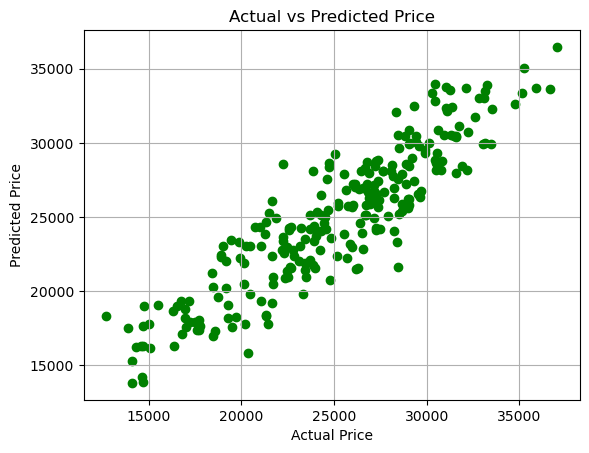

In [55]:
plt.scatter(y_test, y_test_pred ,color='g')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()

In [56]:
from sklearn.linear_model import LassoCV

In [58]:
lasso_cv = LassoCV( cv=5 )

In [59]:
lasso_cv.fit( X_train_sacled , y_train  )

LassoCV(cv=5)

In [60]:
y_train_pred = lasso.predict( X_train_sacled )
y_test_pred = lasso.predict( X_test_sacled )

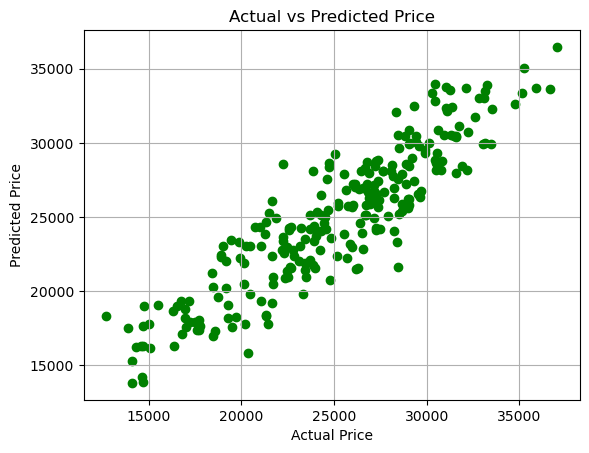

In [61]:
plt.scatter(y_test, y_test_pred ,color='g')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()

In [62]:
print(f'The Accuracy of the traing data:{r2_score( y_train , y_train_pred )}')
print(f'The Mean Absolute Error of the traing data:{mean_absolute_error( y_train , y_train_pred )}')
print(f'The Mean Squared Error of the traing data:{mean_squared_error( y_train , y_train_pred )}')

The Accuracy of the traing data:0.8347380584404636
The Mean Absolute Error of the traing data:1650.2311186538109
The Mean Squared Error of the traing data:4442535.792596984


In [63]:
print(f'The Accuracy of the testing data:{r2_score(y_test , y_test_pred )}')
print(f'The Mean Absolute Error of the testing data:{mean_absolute_error( y_test , y_test_pred )}')
print(f'The Mean Squared Error of the testing data:{mean_squared_error(y_test , y_test_pred )}')

The Accuracy of the testing data:0.8154698009436694
The Mean Absolute Error of the testing data:1779.751866880374
The Mean Squared Error of the testing data:4912179.947935885
